# Sumário

* [1. Análise exploratória de dados](#1.-Análise-exploratória-de-dados)
    * [1.1 Alterando o tipo dos dados](#1.1-Alterando-o-tipo-dos-dados)
<br></br>
* [2. Visualização dos dados](#2.-Visualização-dos-dados)
    * [2.1 Principais canais de aquisição](#2.1-Principais-canais-de-aquisição)
    * [2.2 Principais cadernos de notícias](#2.2-Principais-cadernos-de-notícias)
    * [2.3 Quantidade de leitores por caderno de notícias e canais de aquisição](#2.3-Quantidade-de-leitores-por-caderno-de-notícias-e-canais-de-aquisição)
    * [2.4 Leitura de notícias enviadas por caderno de notícias](#2.4-Leitura-de-notícias-enviadas-por-caderno-de-notícias)
    * [2.5 Análise temporal de leitores](#2.5-Análise-temporal-de-leitores)
        * [2.5.1 Número de cadastros por Newsletter mensal](#2.5.1-Número-de-cadastros-por-Newsletter-mensal)
        * [2.5.2 Número de cadastros por Canal de Aquisição mensal](#2.5.2-Número-de-cadastros-por-Canal-de-Aquisição-mensal)

In [292]:
x = "2.5.2 Número de cadastros por Canal de Aquisição mensal"
print("[%s](#%s)"%(x,x.replace(" ","-")))

[2.5.2 Número de cadastros por Canal de Aquisição mensal](#2.5.2-Número-de-cadastros-por-Canal-de-Aquisição-mensal)


## 1. Análise exploratória de dados

Nesta seção, irei utilizar das bibliotecas Pandas e do IPython para carregar, limpar e visualizar a tabela de dados.

In [218]:
# Bibliotecas utilizadas.
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [421]:
# Após fazer o download do arquivo enviado, coloquei-o na mesma pasta do notebook que estou utilizando.
caminho_dados = "DataSetTheNews.json"
dados_originais = pd.read_json(caminho_dados)
dados_originais.head(7)

,first_name,last_name,email,Entry Date,Last Opened,Open Rate,Newsletter,Entry Channel
0,Chaddy,Smithe,csmithe0@census.gov,24/01/2022,23/09/2021,0.88,the news,GoogleAds
1,Shir,Halloran,shalloran1@narod.ru,10/07/2021,02/01/2022,0.02,the bizness,Referral
2,Gusti,Schwanden,gschwanden2@feedburner.com,01/05/2022,04/08/2021,0.81,the champs,Referral
3,Ted,Kettles,tkettles3@noaa.gov,15/05/2022,15/03/2022,0.20,the bizness,Referral
4,Virginia,Glencorse,vglencorse4@redcross.org,26/06/2022,22/02/2022,0.99,the news,Referral
5,Bruno,Balbeck,bbalbeck5@home.pl,19/10/2021,24/09/2021,0.90,the news,Referral
6,Kev,Duncombe,kduncombe6@marketwatch.com,03/05/2022,12/06/2022,0.15,the news,Organic


Com os dados carregados, começarei a obter informações a respeito do mesmo.

In [6]:
dados_originais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   first_name     973 non-null    object 
 1   last_name      939 non-null    object 
 2   email          973 non-null    object 
 3   Entry Date     939 non-null    object 
 4   Last Opened    939 non-null    object 
 5   Open Rate      939 non-null    float64
 6   Newsletter     939 non-null    object 
 7   Entry Channel  939 non-null    object 
dtypes: float64(1), object(7)
memory usage: 62.6+ KB


Aqui tem dois pontos que merecem a devida atenção: 
Primeiramente, temos 1000 entradas nos dados, porém os dados não estão completos apresentando alguns valores nulos. Como esses valores nulos representam, aparentemente, 61 entradas em diversas partes da tabela acredito que eles sejam todos os mesmos dados, caso essa hipótese seja comprovada verdadeira irei eliminá-los do dataset. 

Podemos também notar que nem todos os nomes e nem todos os e-mails apresentam resultados não-nulos e seguem a mesma ideia de resultados "iguais" para ambos os casos. Acredito que estejamos trabalhando com o mesmo tipo de problema, dados que não apresentam um first_name também não irão apresentar um e-mail.

Em seguida, devido a maneira como eu devo ter salvo os dados aparentemente eles não foram salvos como deveriam.  Assim, irei ajustar os dados necessários e seu devido tipo. Assim teremos:
* `Entry Date`: Tipo data;
* `Last Opened`: Tipo data.

In [7]:
#Em uma primeira análise, simplesmente observo a tabela.
with pd.option_context('display.max_rows', None,
                        'display.max_columns', None):
    display(dados_originais[dados_originais["Newsletter"].isnull()])

,first_name,last_name,email,Entry Date,Last Opened,Open Rate,Newsletter,Entry Channel
7,Natalya,None,nstalman7@canalblog.com,None,None,NaN,None,None
74,Marylin,None,mdurdle22@discuz.net,None,None,NaN,None,None
92,Hurlee,None,hleate2k@nationalgeographic.com,None,None,NaN,None,None
125,Derwin,None,droney3h@usa.gov,None,None,NaN,None,None
129,Gavrielle,None,ghudleston3l@newsvine.com,None,None,NaN,None,None
145,Hedvige,None,hclemmett41@cnet.com,None,None,NaN,None,None
163,Meara,None,mrustan4j@businessweek.com,None,None,NaN,None,None
165,Ania,None,aguilloud4l@wufoo.com,None,None,NaN,None,None
216,Rocky,None,rmalamore60@economist.com,None,None,NaN,None,None
227,None,None,None,None,None,NaN,None,None


In [8]:
# E agora, obtenho o tamanho dessa tabela.
dados_originais[dados_originais["Newsletter"].isnull()].shape

(61, 8)

Portanto, a primeira hipótese de que os 61 tipos de dados são os mesmos foi comprovada. Assim, irei remover esses dados do conjunto de dados de estudo visto que eles não acrescentam em nada.

In [369]:
#Como irei começar a alterar os dados, crio uma cópia para evitar alterações nos dados originais.
dados_TN = dados_originais.dropna(axis=0, subset=["Newsletter"]).copy()

In [370]:
dados_TN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 939 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   first_name     915 non-null    object 
 1   last_name      939 non-null    object 
 2   email          915 non-null    object 
 3   Entry Date     939 non-null    object 
 4   Last Opened    939 non-null    object 
 5   Open Rate      939 non-null    float64
 6   Newsletter     939 non-null    object 
 7   Entry Channel  939 non-null    object 
dtypes: float64(1), object(7)
memory usage: 66.0+ KB


Após uma primeira limpeza, olhemos agora para o caso de nomes e emails nulos. Veremos se esses dados são importantes ou não antes de eliminá-los. Contudo, é importante notar que o número de dados faltantes na coluna nome e email diminui de 27 dados para 24 dados, o que indica que deveriam existir linhas que não continham nenhuma informação. Ao olharmos a tabela anterior, podemos notar que essas linhas eram as de índice [227, 387, 648].

In [371]:
dados_TN[dados_TN["email"].isnull()]

,first_name,last_name,email,Entry Date,Last Opened,Open Rate,Newsletter,Entry Channel
124,None,Manuel,None,03/10/2021,30/06/2021,0.61,the news,Referral
147,None,Greeno,None,24/01/2022,15/02/2022,0.10,the stories,Influencer
156,None,Shoute,None,11/01/2022,28/02/2022,0.46,the news,Organic
159,None,Bellelli,None,19/07/2021,13/01/2022,0.87,the news,Referral
174,None,Zoppie,None,29/01/2022,06/03/2022,0.50,the stories,Influencer
182,None,Petric,None,23/10/2021,13/09/2021,0.31,the bizness,Organic
326,None,Siehard,None,07/10/2021,13/06/2022,0.48,the bizness,GoogleAds
356,None,Happer,None,29/09/2021,06/08/2021,0.38,the bizness,Insta
367,None,Prinett,None,27/09/2021,31/01/2022,0.61,the news,Insta
383,None,Denyukhin,None,10/07/2021,29/10/2021,0.15,the stories,Insta


In [372]:
dados_TN[dados_TN["email"].isnull()].shape

(24, 8)

A princípio esses dados estão "completos", se ignorarmos a falta do e-mail e o nome do usuário. Portanto, em um primeiro momento irei mantê-los e caso seja necessário utilizar o e-mail ou o nome irei removê-los. 

### 1.1 Alterando o tipo dos dados

Aqui, irei alterar os dados, utilizando o mesmo tipo de observação feita anteriormente. Ou seja, irei alterar:

* `Entry Date`: Tipo data;
* `Last Opened`: Tipo data;

Antes de alterar esses dados, irei separar os dados por mês e ano, isso deve auxiliar quando eu for analizar os dados usando esses parâmetros.

In [375]:
dados_TN[["Cadastro_Mês","Cadastro_Ano"]] = dados_TN["Entry Date"].str.split("/",expand=True)[[1,2]]
dados_TN["Cadastro_Mês-Ano"] = dados_TN["Cadastro_Mês"]+"/"+dados_TN["Cadastro_Ano"]

Com isso feito, altero o tipo dos dados.

In [393]:
dados_TN["Entry Date"] = pd.to_datetime(dados_TN["Entry Date"])
dados_TN["Last Opened"] = pd.to_datetime(dados_TN["Last Opened"])

In [395]:
dados_TN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 939 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   first_name        915 non-null    object        
 1   last_name         939 non-null    object        
 2   email             915 non-null    object        
 3   Entry Date        939 non-null    datetime64[ns]
 4   Last Opened       939 non-null    datetime64[ns]
 5   Open Rate         939 non-null    float64       
 6   Newsletter        939 non-null    object        
 7   Entry Channel     939 non-null    object        
 8   Cadastro_Mês      939 non-null    object        
 9   Cadastro_Ano      939 non-null    object        
 10  Cadastro_Mês-Ano  939 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 88.0+ KB


Muito bem, agora nossos resultados estão no tipo correto. Por fim, obtenho apenas uma descrição estatística dos dados presentes.

## 2. Visualização dos dados

Nesta seção, irei utilizar das bibliotecas Matplotlib e do Seaborn para a visualização dos resultados.

### 2.1 Principais canais de aquisição

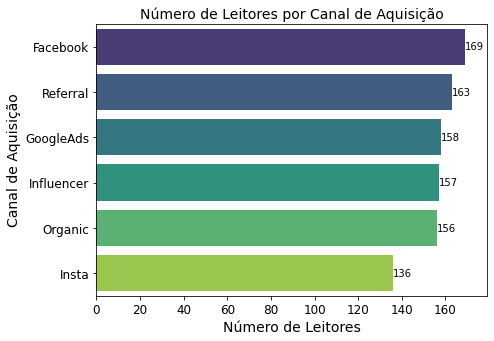

In [16]:
fonte = {"size":14}
plt.figure(figsize=(7,5))
ax = sns.countplot(data = dados_TN, y = "Entry Channel", palette = "viridis",
                   order = dados_TN.groupby(["Entry Channel"]).count()["Entry Date"].sort_values(ascending=False).index)
ax.bar_label(ax.containers[0])
plt.ylabel("Canal de Aquisição",fontdict = fonte)
plt.xlabel("Número de Leitores",fontdict = fonte)
plt.xlim((0,179))
plt.title("Número de Leitores por Canal de Aquisição", fontdict = fonte)
plt.tick_params(labelsize=12)
plt.show()

É fácil notar que o Facebook, seguido de indicações, são os canais que mais permitem adquirir clientes para o The News. Em seguida, temos o GoogleAds e Influencers como sendo plataformas praticamente empatadas na aquisição de clientes. Por fim, temos pesquisas orgânicas e o Instagram.

Olhando para os canais que podemos utilizar dinheiro para impulsionar a aquisição de clientes, o ideal seria investir mais no Facebook enquanto GoogleAds e Influencers estariam "pareados" numa questão de investimento, em uma visão de quanto gastar em cada e, por fim, ter um investimento menor no Instagram. Em um ponto mais adiante iremos analisar esses três métodos e quais os cadernos de notícias (ou newsletter se preferir) são mais afetados por eles, assim é possível fazer um marketing mais direcionado visando melhores resultados.

Para referências, poderíamos pensar na criação de um programa que permitiria aos usuários enviar "convites" para o site, caso o convidado se cadastre o convidante ganharia algum desconto em sua assinatura por algum tempo. Um programa semelhante aparentemente já está presente no site chamado de <a href=https://thenewscc.com.br/category/programa-de-indicacao/>Programa de Indicação</a>. Talvez seja possível conseguir um maior engajamento nesse programa através de eventos, ao olharmos esse programa no site podemos ver que o último evento aparenta ter ocorrido em 2021. Esses eventos podem ser mensais ou em certas datas especiais (como por exemplo no mês de aniversário da The News).

Por fim, os canais orgânicos são mais complicados, visto que esses requerem tempo e conteúdo para serem efetivos. Uma ideia que pode ser explorada seria um canal no Youtube, onde seriam colocados resumos sobre as 10 (ou 5, isso é algo que pode ser discutido) matérias mais lidas da semana ou do mês para cada caderno de notícias. Mais adiante, irei também analizar quais são as newsletters preferidas dos que encontraram o portal através desse método.

### 2.2 Principais cadernos de notícias

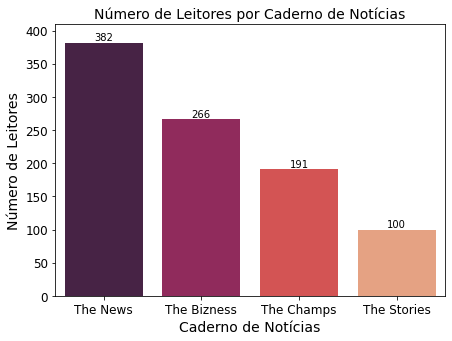

In [141]:
fonte = {"size":14}
plt.figure(figsize=(7,5))
ax = sns.countplot(data = dados_TN, x = "Newsletter", palette = "rocket")
ax.bar_label(ax.containers[0])
plt.xlabel("Caderno de Notícias",fontdict = fonte)
plt.ylabel("Número de Leitores",fontdict = fonte)
plt.ylim((0,410))
plt.title("Número de Leitores por Caderno de Notícias", fontdict = fonte)
plt.tick_params(labelsize=12)
plt.show()

### 2.3 Quantidade de leitores por caderno de notícias e canais de aquisição

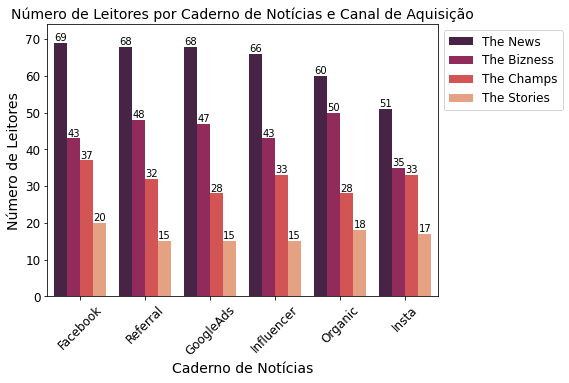

In [142]:
fonte = {"size":14}
plt.figure(figsize=(7,5))
ax = sns.countplot(data = dados_TN, x = "Entry Channel", palette = "rocket", hue="Newsletter",
                   order = dados_TN.groupby(["Entry Channel"]).count()["Entry Date"].sort_values(ascending=False).index)
for i in range(0,4):
    ax.bar_label(ax.containers[i])
ax.legend(bbox_to_anchor=(1,1),fontsize=12)
plt.xlabel("Caderno de Notícias",fontdict = fonte)
plt.ylabel("Número de Leitores",fontdict = fonte)
plt.ylim((0,74))
plt.title("Número de Leitores por Caderno de Notícias e Canal de Aquisição", fontdict = fonte)
plt.tick_params(labelsize=12)
plt.xticks(rotation=45)
plt.show()

Agora podemos fazer uma separação do quais cadernos de notícias deveríamos focar em campanhas de marketing pago. De maneira geral, seja no Facebook, através do GoogleAds, Influencers ou o Instagram as notícias que compõem o caderno "The News" são as mais procuradas pelos clientes. Seguida pelo "The Bizness", "The Champs" e o "The Stories".

Assim, campanhas de marketing pago focando no "The News" e no "The Bizness" seriam um bom foco para campanhas através do Facebook, do GoogleAds e de Influencers.

Contudo, a situação muda quando falamos do Instagram, ali a seção "The News" continua como sendo a mais importante, contudo o The Bizness e o The Champs estão praticamente "empatados" na aquisição de clientes. Assim no Instagram talvez impulsionar essas três newsletters seria uma boa ideia. 

Para um marketing orgânico, continuamos tendo a seção "The News" no topo, contudo nesse tipo de marketing a seção "The Bizness" está logo atrás e a diferença entre ambas é relativamente pequena, portanto a criação de mais conteúdo com foco nessas duas seções possa gerar um maior efeito na aquisição de leitores.

### 2.4 Leitura de notícias enviadas por caderno de notícias

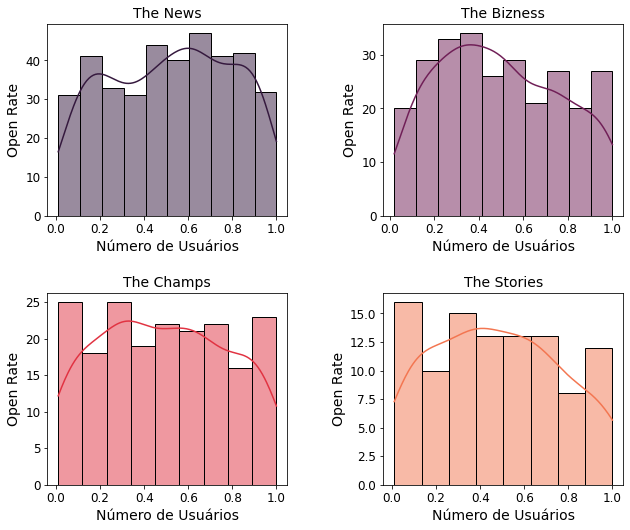

In [215]:
fonte = {"size":14}
def labels(i,j,x,y,titulo):
    axes[i,j].set_xlabel(x, fontdict=fonte)
    axes[i,j].set_ylabel(y, fontdict=fonte)
    axes[i,j].tick_params(labelsize=12)
    axes[i,j].set_title(titulo, fontdict=fonte)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (10,8))
plt.subplots_adjust(left=0.1, bottom=0.1, 
                    right=0.9, top=0.9, 
                    wspace=0.4, hspace=0.4)
cores = sns.color_palette("rocket", as_cmap=False)

#News
sns.histplot(data = dados_TN[dados_TN["Newsletter"] == "The News"], color=cores[0],
             x = "Open Rate", palette = "rocket", ax = axes[0,0], kde=True)
labels(0,0,"Número de Usuários","Open Rate","The News")

#Bizness
sns.histplot(data = dados_TN[dados_TN["Newsletter"] == "The Bizness"], color=cores[1],
             x = "Open Rate", palette = "rocket", ax = axes[0,1], kde=True)
labels(0,1,"Número de Usuários","Open Rate","The Bizness")

#Champs
sns.histplot(data = dados_TN[dados_TN["Newsletter"] == "The Champs"], color=cores[3],
             x = "Open Rate", palette = "rocket", ax = axes[1,0], kde=True)
labels(1,0,"Número de Usuários","Open Rate","The Champs")

#Stories
sns.histplot(data = dados_TN[dados_TN["Newsletter"] == "The Stories"], color=cores[4],
             x = "Open Rate", palette = "rocket", ax = axes[1,1], kde=True)
labels(1,1,"Número de Usuários","Open Rate","The Stories")

plt.show()

Agora, podemos ver que a maioria dos leitores do "The News" leêm cerca de 60% a 70% das notícias enviadas a eles. Algo que me chamou atenção é que os leitores do "The Bizness", que apresentam uma elevada taxa de retenção de leitores através do marketing orgânico, não costumam ler tanto as notícias enviadas, tendo seu pico de leitura em torno de 30% a 40%.

Temos os leitores do "The Champs" lendo em torno de 20% a 30% com dois picos extremamente próximos, o primeiro estando entre nenhuma noticia lida e 10%, enquanto o segundo está entre 20% e 30%. Por fim temos o "The Stories" que também apresenta dois picos próximos um do outro, o primeiro entre nenhuma notícia lida e 10%, enquanto o segundo também está entre 20% e 30%.

Uma análise mais detalhada dos dados poderia revelar quais são os tipos de notícias mais lidas em cada Newsletter, poderiamos então focar na criação de mais conteúdo relacionado. 

### 2.5 Análise temporal de leitores

Aqui irei utilizar da data de cadastro (presumo ser a coluna Entry Date) e do tipo de canal de aquisição para tentar ver como a passagem do tempo afetou a obtenção de leitores.

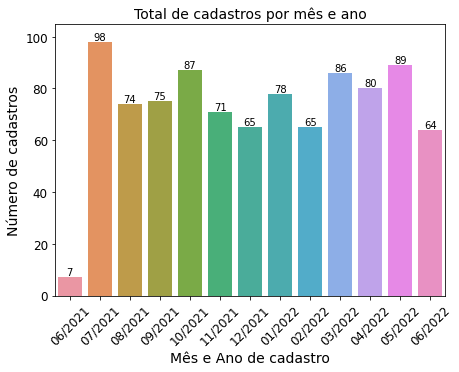

In [404]:
fonte = {"size":14}
plt.figure(figsize=(7,5))
ax = sns.countplot(data=dados_TN.sort_values(by=["Cadastro_Ano","Cadastro_Mês"]), x="Cadastro_Mês-Ano")
ax.bar_label(ax.containers[0])
plt.xlabel("Mês e Ano de cadastro", fontdict=fonte)
plt.ylabel("Número de cadastros", fontdict=fonte)
plt.ylim((0,105))
plt.title("Total de cadastros por mês e ano", fontdict=fonte)
plt.tick_params(labelsize=12)
plt.xticks(rotation=45)
plt.show()

#### 2.5.1 Número de cadastros por Newsletter mensal

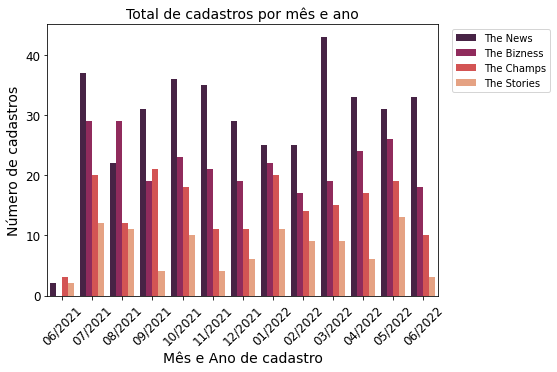

In [417]:
fonte = {"size":14}
plt.figure(figsize=(7,5))
ax = sns.countplot(data=dados_TN.sort_values(by=["Cadastro_Ano","Cadastro_Mês"]), x="Cadastro_Mês-Ano", palette = "rocket", hue="Newsletter",
             hue_order=["The News","The Bizness", "The Champs", "The Stories"])
plt.xlabel("Mês e Ano de cadastro", fontdict=fonte)
plt.ylabel("Número de cadastros", fontdict=fonte)
plt.title("Total de cadastros por mês e ano", fontdict=fonte)
plt.legend(bbox_to_anchor=(1.3,1))
plt.tick_params(labelsize=12)
plt.xticks(rotation=45)
plt.show()

#### 2.5.2 Número de cadastros por Canal de Aquisição mensal

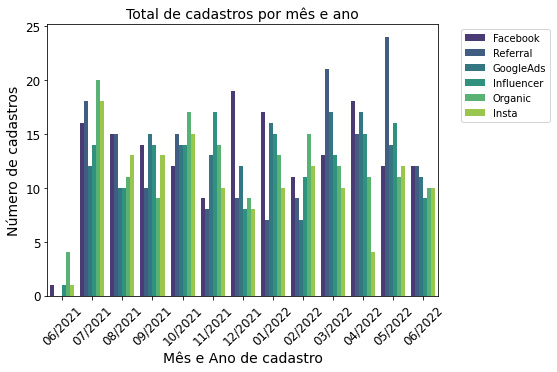

In [418]:
fonte = {"size":14}
plt.figure(figsize=(7,5))
ax = sns.countplot(data=dados_TN.sort_values(by=["Cadastro_Ano","Cadastro_Mês"]), x="Cadastro_Mês-Ano", palette = "viridis", hue="Entry Channel",
             hue_order=["Facebook","Referral","GoogleAds","Influencer","Organic","Insta"])
plt.xlabel("Mês e Ano de cadastro", fontdict=fonte)
plt.ylabel("Número de cadastros", fontdict=fonte)
plt.title("Total de cadastros por mês e ano", fontdict=fonte)
plt.legend(bbox_to_anchor=(1.3,1))
plt.tick_params(labelsize=12)
plt.xticks(rotation=45)
plt.show()